In [78]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [79]:
parser = Sbopen()
# The .event method from StatsBomb returns four different dataframes
# "events", "related", "freeze", "tactics"
df, related, freeze, tactics = parser.event(15946)

In [80]:
# From the "team_name" column, find the unique values of home team (team1), and away team (team2)
team1, team2 = df.team_name.unique()

In [81]:
# A df of shots --> set id as the index column
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

# Making the shot map using iterative solution

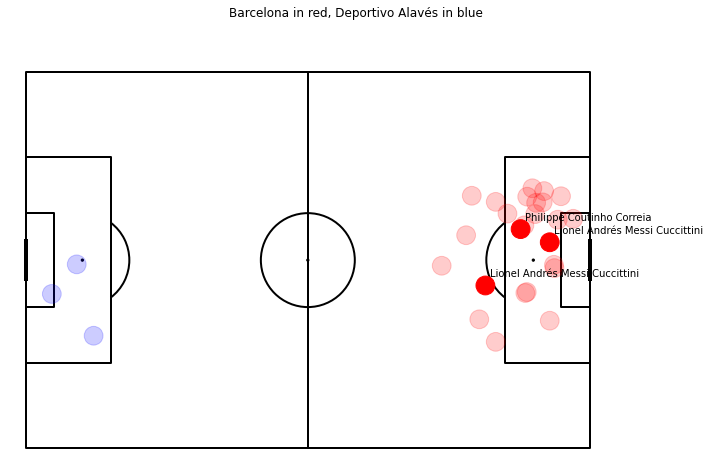

In [50]:
# Create the pitch with the help from mplsoccer
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize=(10, 7))
# size of the pitch - displayed in yards
pitchLengthX = 120
pitchWidthY = 80
# Plot the shots
for i, shot in shots.iterrows():
    x = shot['x']
    y = shot['y']
    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']
    # set circle size
    circleSize = 2
    # plot home team
    if (team_name == team1):
        if goal:
            shotCircle = plt.Circle((x,y), circleSize, color = 'red')
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle = plt.Circle((x,y), circleSize, color = 'red')
            shotCircle.set_alpha(.2)
    # plot away team
    else:
        if goal:
            shotCircle = plt.Circle((pitchLengthX-x, pitchWidthY-y), circleSize, color = 'blue')
            plt.text(pitchLengthX-x + 1, pitchWidthY-y-2, shot['player_name'])
        else:
            shotCircle = plt.Circle((pitchLengthX-x, pitchWidthY-y), circleSize, color = 'blue')
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
fig.suptitle(f'{team1} in red, {team2} in blue')
fig.set_size_inches(10,7)
plt.show()

# Using mplsoccer’s Pitch class

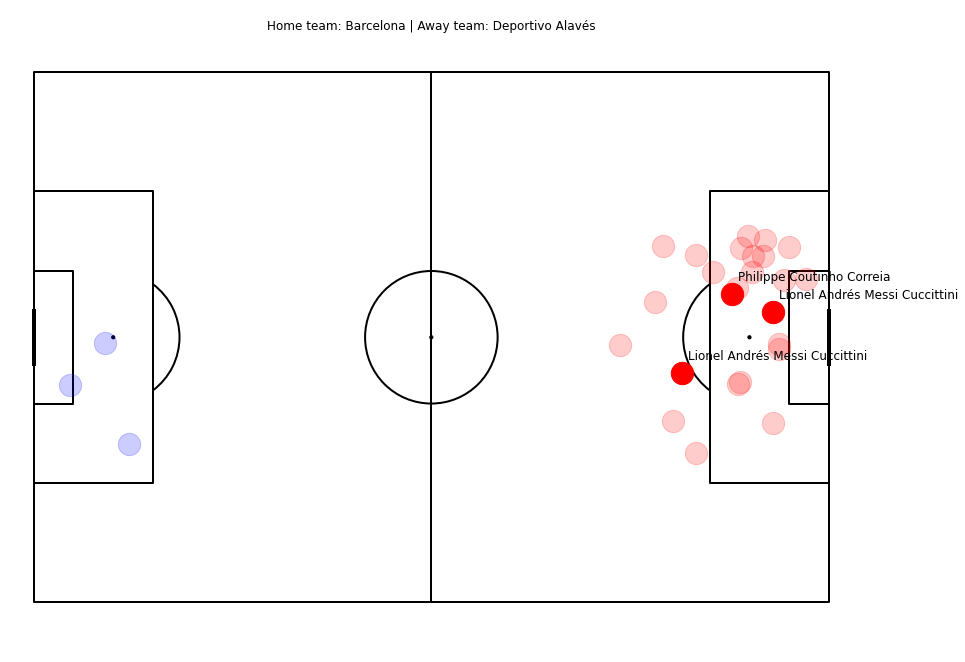

In [91]:
# create pitch 
pitch = Pitch(line_color = 'black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)
# create mask to use on main df, then use main df to and apply the filter (mask_team1) to create a new df with selected columns
mask_team1 = (df.type_name == 'Shot') & (df.team_name == team1)
df_team1 = df.loc[mask_team1, ['x', 'y', 'outcome_name', 'player_name']]

# Home team
for i, row in df_team1.iterrows():
    if row['outcome_name'] == 'Goal':
        # make the circle
        pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = 'red', ax = ax['pitch'])
        pitch.annotate(row['player_name'], (row.x + 1, row.y - 2), ax = ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = 'red', ax = ax['pitch'])
    
mask_team2 = (df.type_name == 'Shot') & (df.team_name == team2)
df_team2 = df.loc[mask_team2, ['x', 'y', 'outcome_name', 'player_name']]

# Away team
for i, row in df_team2.iterrows():
    if row['outcome_name'] == 'Goal':
        # make the circle
        pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = 'blue', ax = ax['pitch'])
        pitch.annotate(row['player_name'], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = 'blue', ax = ax['pitch'])

fig.suptitle(f'Home team: {team1} | Away team: {team2}')
plt.show()

# Plotting shots on one half - mplsoccer’s Pitch class

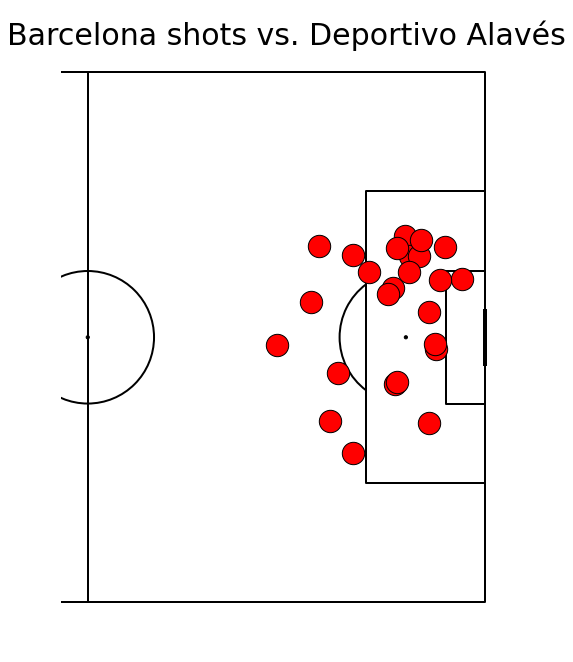

In [96]:
pitch = Pitch(line_color = 'black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

pitch.scatter(df_team1.x, df_team1.y, alpha = 1, s = 500, color = 'red', ax=ax['pitch'], edgecolors = 'black')
fig.suptitle(f'{team1} shots vs. {team2}', fontsize = 30)
plt.show()

# Plotting shots on vertical pitch alt. 1 - iterative solution

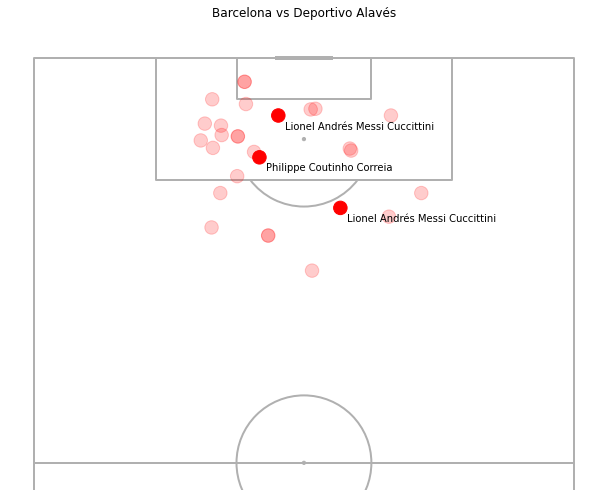

In [131]:
# Create the pitch with the help from mplsoccer
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()
# size of the pitch - displayed in yards
pitchLengthX = 60
pitchWidthY = 40

# Plot the shots
for i, shot in shots.iterrows():
    x = shot['x']
    y = shot['y']
    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']
    # set circle size
    circleSize = 1
    # plot home team
    if (team_name == team1):
        if goal:
            shotCircle = plt.Circle((y,x), circleSize,color = 'red')
            plt.text(y+1,x-2,shot['player_name'])
        else:
            shotCircle = plt.Circle((y,x), circleSize, color = 'red')
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
fig.suptitle(f'{team1} vs {team2}')
fig.set_size_inches(10,7)
plt.show()

# Plotting shots on vertical pitch alt. 2 - mplsoccer’s Pitch class

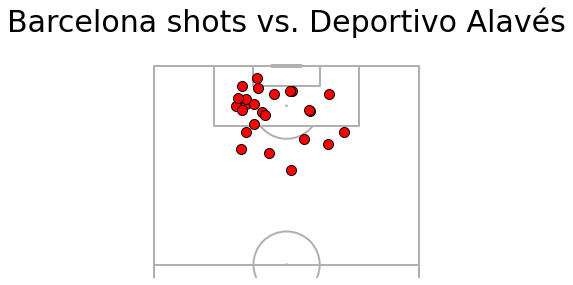

In [102]:
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()

pitch.scatter(df_team1.x, df_team1.y, alpha = 1, s = 100, color = 'red', ax = ax, edgecolor = 'black')
fig.suptitle(f'{team1} shots vs. {team2}', fontsize = 30)
plt.show()